# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# manipulating the default plot size
plt.rcParams['figure.figsize'] = 10,12

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# for date and time opeations
from datetime import datetime
# for file and folder operations
import os
# for regular expression opeations
import re
# for listing files in a folder
import glob
# for getting web contents
import requests 
# for scraping web contents
from bs4 import BeautifulSoup

In [3]:
link = 'https://www.mohfw.gov.in'
req = requests.get(link)
soup = BeautifulSoup(req.content,"html.parser")

In [4]:
thead = soup.find_all('thead')[-1]
head = thead.find_all('tr')
tbody = soup.find_all('tbody')[-1]
body = tbody.find_all('tr')

In [5]:
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)

In [6]:
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6],columns=head_rows[0])
df_bs.drop('S. No.',axis = 1, inplace=True)

In [7]:
df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,44,46,0,90
1,Andhra Pradesh,7479,6232,180,13891
2,Arunachal Pradesh,125,61,1,187
3,Assam,2408,5333,11,7752
4,Bihar,2188,7390,62,9640
5,Chandigarh,80,349,6,435
6,Chhattisgarh,575,2173,13,2761
7,Dadra and Nagar Haveli and Daman and Diu,126,77,0,203
8,Delhi,26246,56235,2680,85161
9,Goa,717,478,3,1198


# Data Cleaning

In [8]:
df_India = df_bs.copy()
now = datetime.now()
df_India['Date'] = now.strftime("%m/%d/%Y")
df_India['Date'] = pd.to_datetime(df_India['Date'],format = "%m/%d/%Y")
df_India.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date
0,Andaman and Nicobar Islands,44,46,0,90,2020-06-30
1,Andhra Pradesh,7479,6232,180,13891,2020-06-30
2,Arunachal Pradesh,125,61,1,187,2020-06-30
3,Assam,2408,5333,11,7752,2020-06-30
4,Bihar,2188,7390,62,9640,2020-06-30
5,Chandigarh,80,349,6,435,2020-06-30
6,Chhattisgarh,575,2173,13,2761,2020-06-30
7,Dadra and Nagar Haveli and Daman and Diu,126,77,0,203,2020-06-30
8,Delhi,26246,56235,2680,85161,2020-06-30
9,Goa,717,478,3,1198,2020-06-30


In [9]:
df_India['Name of State / UT'] = df_India['Name of State / UT'].str.replace('#', '')
df_India['Deaths**'] = df_India['Deaths**'].str.replace('#', '')

df_India = df_India.rename(columns={'Active Cases*': 'Active'})   
df_India = df_India.rename(columns={'Total Confirmed cases*': 'Confirmed'})
df_India = df_India.rename(columns={'Cured/Discharged/Migrated*':'Cured'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Name of State / UT':'State/UnionTerritory'})
df_India = df_India.rename(columns={'Deaths ( more than 70% cases due to comorbidities )':'Deaths', 
                                      'Deaths**':'Deaths'})

In [10]:
df_India.head(36)

,State/UnionTerritory,Active,Cured,Deaths,Confirmed,Date
0,Andaman and Nicobar Islands,44,46,0,90,2020-06-30
1,Andhra Pradesh,7479,6232,180,13891,2020-06-30
2,Arunachal Pradesh,125,61,1,187,2020-06-30
3,Assam,2408,5333,11,7752,2020-06-30
4,Bihar,2188,7390,62,9640,2020-06-30
5,Chandigarh,80,349,6,435,2020-06-30
6,Chhattisgarh,575,2173,13,2761,2020-06-30
7,Dadra and Nagar Haveli and Daman and Diu,126,77,0,203,2020-06-30
8,Delhi,26246,56235,2680,85161,2020-06-30
9,Goa,717,478,3,1198,2020-06-30


In [11]:
df_India['Date'] = pd.to_datetime(df_India['Date'])
df_India['State/UnionTerritory'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry', 'Puducherry', inplace=True) 

In [12]:
file_name = now.strftime("%Y_%m_%d")+' - COVID-19.csv'

# location for saving the file
file_loc = '/content'

# save file as a scv file
df_India.to_csv(file_loc + file_name, index=False)

In [13]:
df= pd.read_csv('/content2020_06_30 - COVID-19.csv')
df_india = df.copy()
df

,State/UnionTerritory,Active,Cured,Deaths,Confirmed,Date
0,Andaman and Nicobar Islands,44,46,0,90,2020-06-30
1,Andhra Pradesh,7479,6232,180,13891,2020-06-30
2,Arunachal Pradesh,125,61,1,187,2020-06-30
3,Assam,2408,5333,11,7752,2020-06-30
4,Bihar,2188,7390,62,9640,2020-06-30
5,Chandigarh,80,349,6,435,2020-06-30
6,Chhattisgarh,575,2173,13,2761,2020-06-30
7,Dadra and Nagar Haveli and Daman and Diu,126,77,0,203,2020-06-30
8,Delhi,26246,56235,2680,85161,2020-06-30
9,Goa,717,478,3,1198,2020-06-30


# Find the total number of COVID-19 cases in India till date

In [14]:
df_temp = df.drop(['Date'],axis=1)
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Active,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,44,46,0,90
1,Andhra Pradesh,7479,6232,180,13891
2,Arunachal Pradesh,125,61,1,187
3,Assam,2408,5333,11,7752
4,Bihar,2188,7390,62,9640
5,Chandigarh,80,349,6,435
6,Chhattisgarh,575,2173,13,2761
7,Dadra and Nagar Haveli and Daman and Diu,126,77,0,203
8,Delhi,26246,56235,2680,85161
9,Goa,717,478,3,1198


In [15]:
today = now.strftime("%Y/%m/%d")
total_activeCases = df['Active'].sum()
print("Total people who were Active as of "+today+" are: ", total_activeCases)
total_cured = df['Cured'].sum()
print("Total people who were cured as of "+today+" are: ", total_cured)
total_cases = df['Confirmed'].sum()
print("Total people who were detected COVID+ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)

Total people who were Active as of 2020/06/30 are:  208121
Total people who were cured as of 2020/06/30 are:  334822
Total people who were detected COVID+ve as of 2020/06/30 are:  559836
Total people who died due to COVID19 as of 2020/06/30 are:  16893


#Which state is the most recent with COVID-19 case?

In [16]:
tot_active = df.groupby('State/UnionTerritory')['Active'].sum().sort_values(ascending=False).to_frame()
tot_active.style.background_gradient(cmap='Reds')

,Active
State/UnionTerritory,
Maharashtra,73313
Tamil Nadu,37334
Delhi,26246
Telangana,9559
Andhra Pradesh,7479
Gujarat,6871
Uttar Pradesh,6650
Karnataka,6386
West Bengal,5535


## Therefore Maharashtra is most Recent wiith Covid 19 Cases

**What is the total number of active COVID-19 cases in India?**

In [17]:
total_activeCases = df['Active'].sum()
print("Total people who were Active as of "+today+" are: ", total_activeCases)

Total people who were Active as of 2020/06/30 are:  208121


**Create multiple visualization and compare thespread of COVID-19 in India with Iran**

In [18]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-28-2020.csv')

In [19]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()

In [20]:
k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='India'].loc[:,'1/30/20':]
india_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='India'].loc[:,'1/30/20':]
india_recovered = k.values.tolist()[0] 

In [21]:
k = df1[df1['Country/Region']=='Iran'].loc[:,'1/30/20':]
iran_confirmed = k.values.tolist()[0] 

k = df2[df2['Country/Region']=='Iran'].loc[:,'1/30/20':]
iran_deaths = k.values.tolist()[0] 

k = df3[df3['Country/Region']=='Iran'].loc[:,'1/30/20':]
iran_recovered = k.values.tolist()[0] 

# Visualization for India and Iran(Confirmed,Death,Recovered)

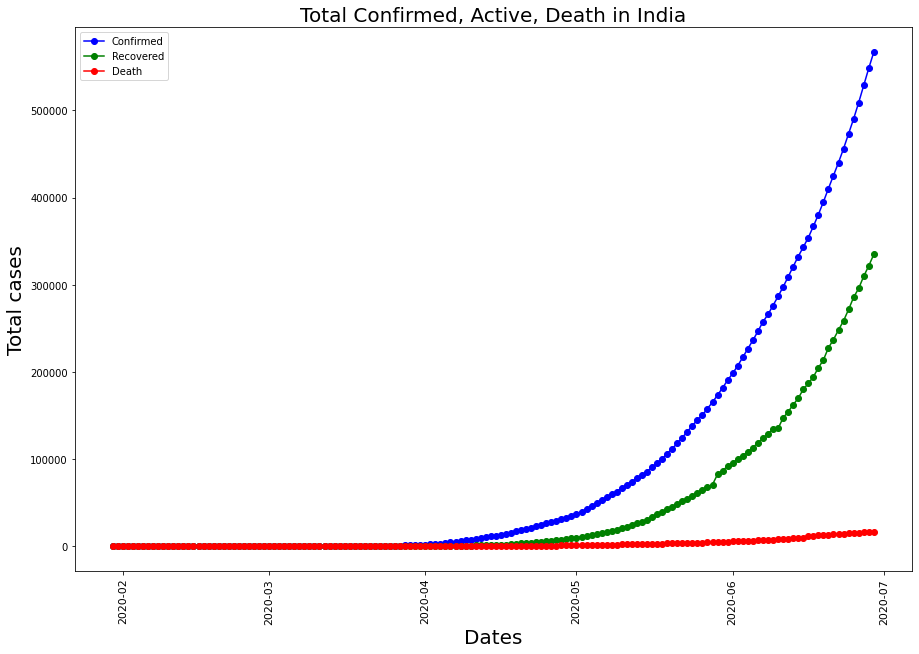

In [22]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in India" , fontsize = 20)

ax1 = plt.plot_date(y= india_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= india_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= india_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

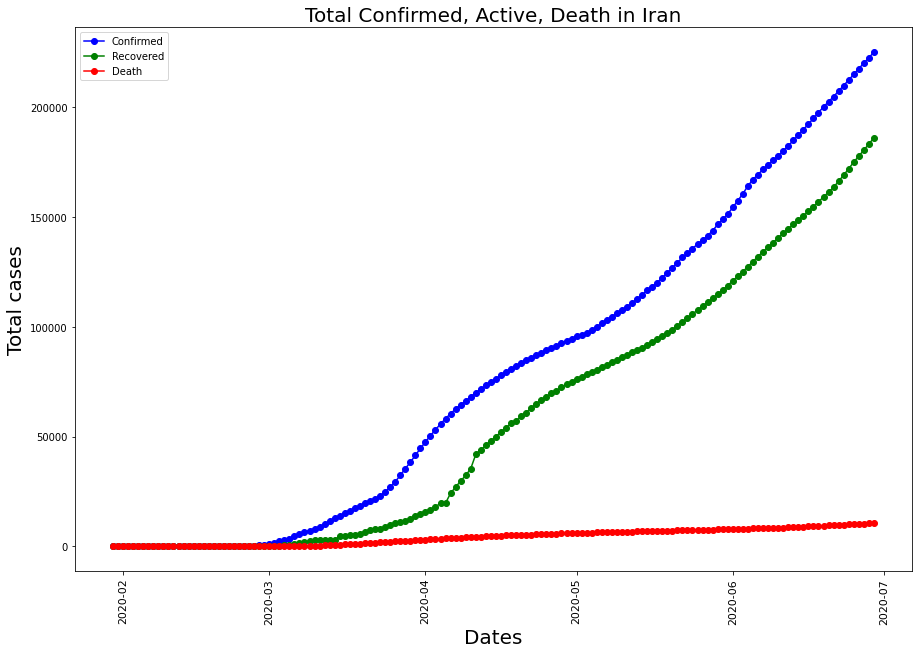

In [23]:
plt.figure(figsize= (15,10))
plt.xticks(rotation = 90 ,fontsize = 11)
plt.yticks(fontsize = 10)
plt.xlabel("Dates",fontsize = 20)
plt.ylabel('Total cases',fontsize = 20)
plt.title("Total Confirmed, Active, Death in Iran" , fontsize = 20)

ax1 = plt.plot_date(y= iran_confirmed,x= dates_india,label = 'Confirmed',linestyle ='-',color = 'b')
ax2 = plt.plot_date(y= iran_recovered,x= dates_india,label = 'Recovered',linestyle ='-',color = 'g')
ax3 = plt.plot_date(y= iran_deaths,x= dates_india,label = 'Death',linestyle ='-',color = 'r')
plt.legend()

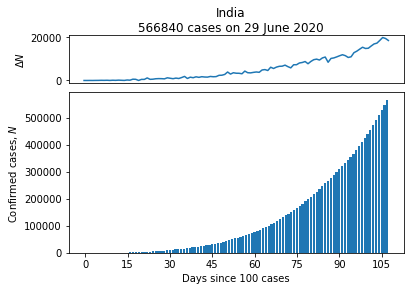

In [28]:
from matplotlib.ticker import MaxNLocator
grouped = confirmed_df.groupby('Country/Region')
df2 = grouped.sum()
country = 'India'
MIN_CASES = 100

def make_plot(country):
    """Make the bar plot of case numbers and change in numbers line plot."""

    # Extract the Series corresponding to the case numbers for country.
    c_df = df2.loc[country, df2.columns[3:]]
    # Discard any columns with fewer than MIN_CASES.
    c_df = c_df[c_df >= MIN_CASES].astype(int)
    # Convet index to a proper datetime object
    c_df.index = pd.to_datetime(c_df.index)
    n = len(c_df)
    if n == 0:
        print('Too few data to plot: minimum number of cases is {}'
                .format(MIN_CASES))
        sys.exit(1)

    fig = plt.Figure()

    # Arrange the subplots on a grid: the top plot (case number change) is
    # one quarter the height of the bar chart (total confirmed case numbers).
    ax2 = plt.subplot2grid((4,1), (0,0))
    ax1 = plt.subplot2grid((4,1), (1,0), rowspan=3)
    ax1.bar(range(n), c_df.values)
    # Force the x-axis to be in integers (whole number of days) in case
    # Matplotlib chooses some non-integral number of days to label).
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    c_df_change = c_df.diff()
    ax2.plot(range(n), c_df_change.values)
    ax2.set_xticks([])

    ax1.set_xlabel('Days since {} cases'.format(MIN_CASES))
    ax1.set_ylabel('Confirmed cases, $N$')
    ax2.set_ylabel('$\Delta N$')

    # Add a title reporting the latest number of cases available.
    title = '{}\n{} cases on {}'.format(country, c_df[-1],
                c_df.index[-1].strftime('%d %B %Y'))
    plt.suptitle(title)

make_plot(country)
plt.show()

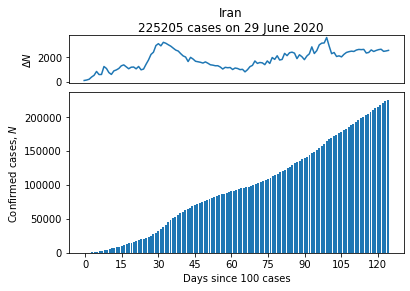

In [29]:
from matplotlib.ticker import MaxNLocator
grouped = confirmed_df.groupby('Country/Region')
df2 = grouped.sum()
country = 'Iran'
MIN_CASES = 100

def make_plot(country):
    """Make the bar plot of case numbers and change in numbers line plot."""

    # Extract the Series corresponding to the case numbers for country.
    c_df = df2.loc[country, df2.columns[3:]]
    # Discard any columns with fewer than MIN_CASES.
    c_df = c_df[c_df >= MIN_CASES].astype(int)
    # Convet index to a proper datetime object
    c_df.index = pd.to_datetime(c_df.index)
    n = len(c_df)
    if n == 0:
        print('Too few data to plot: minimum number of cases is {}'
                .format(MIN_CASES))
        sys.exit(1)

    fig = plt.Figure()

    # Arrange the subplots on a grid: the top plot (case number change) is
    # one quarter the height of the bar chart (total confirmed case numbers).
    ax2 = plt.subplot2grid((4,1), (0,0))
    ax1 = plt.subplot2grid((4,1), (1,0), rowspan=3)
    ax1.bar(range(n), c_df.values)
    # Force the x-axis to be in integers (whole number of days) in case
    # Matplotlib chooses some non-integral number of days to label).
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

    c_df_change = c_df.diff()
    ax2.plot(range(n), c_df_change.values)
    ax2.set_xticks([])

    ax1.set_xlabel('Days since {} cases'.format(MIN_CASES))
    ax1.set_ylabel('Confirmed cases, $N$')
    ax2.set_ylabel('$\Delta N$')

    # Add a title reporting the latest number of cases available.
    title = '{}\n{} cases on {}'.format(country, c_df[-1],
                c_df.index[-1].strftime('%d %B %Y'))
    plt.suptitle(title)

make_plot(country)
plt.show()

**Use Prophet to forecast the data for next 10 days with 97% confidence interval**

In [30]:
!pip install Prophet

     |████████████████████████████████| 92kB 4.0MB/s 
  Created wheel for Prophet: filename=prophet-0.1.1.post1-cp36-none-any.whl size=13236 sha256=4f75683a3505f84bbc2d1920b07e7b5f6ef0e097dce6909ace49de546b339be9
  Stored in directory: /root/.cache/pip/wheels/71/d7/4f/0ade9b5843362f84d39c21edbe6065032e388053c4ab0ab83e
Successfully built Prophet


In [42]:
from fbprophet import Prophet
from fbprophet.plot import  plot_plotly,add_changepoints_to_plot

dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]

k = df1[df1['Country/Region']=='India'].loc[:,'1/30/20':]
india_confirmed = k.values.tolist()[0]
k = df1[df1['Country/Region']=='Iran'].loc[:,'1/30/20':]
iran_confirmed = k.values.tolist()[0]

# for India
data_india= pd.DataFrame(columns=['ds','y'])
data_india['ds'] = dates_india
data_india['y'] = india_confirmed

# for Iran
data_iran= pd.DataFrame(columns=['ds','y'])
data_iran['ds'] = dates_india
data_iran['y'] = iran_confirmed

In [43]:
# Forcasting Comfirmed Cases for next 10 days for India

prop = Prophet(interval_width=0.97)
prop.fit(data_india)
future_india = prop.make_future_dataframe(periods=10)
future_india.tail(10)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
152,2020-06-30
153,2020-07-01
154,2020-07-02
155,2020-07-03
156,2020-07-04
157,2020-07-05
158,2020-07-06
159,2020-07-07
160,2020-07-08
161,2020-07-09


In [44]:
forecast = prop.predict(future_india)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
157,2020-07-05,601251.021429,585192.471196,617001.276274
158,2020-07-06,613365.703075,596467.354717,629972.218592
159,2020-07-07,623560.746735,605856.391618,640057.344497
160,2020-07-08,635758.194337,616357.420855,653050.561785
161,2020-07-09,648141.997459,628567.722307,667654.922807


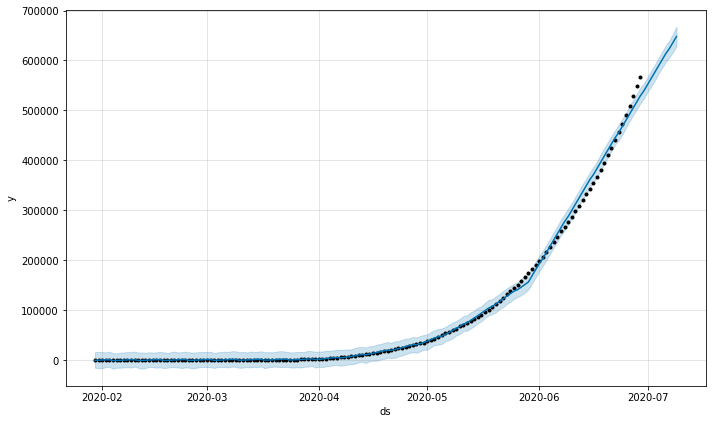

In [45]:
confirmed_forecast_indiaPlot = prop.plot(forecast)

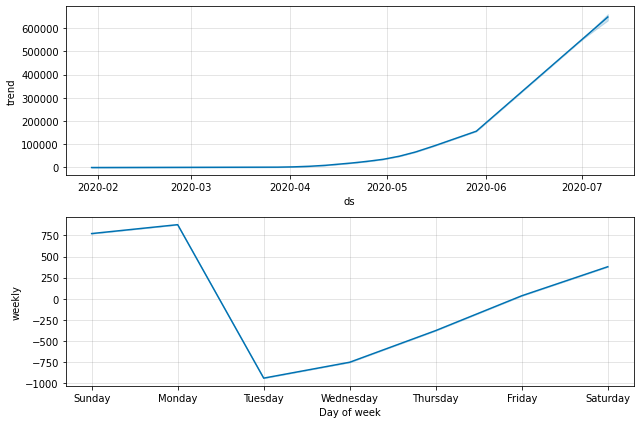

In [46]:
confirmed_forecast_indiaPlot =prop.plot_components(forecast)

In [47]:
# Forcasting Comfirmed Cases for next 10 days for Iran

prop = Prophet(interval_width=0.97)
prop.fit(data_iran)
future_iran = prop.make_future_dataframe(periods=10)
future_iran.tail(10)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
152,2020-06-30
153,2020-07-01
154,2020-07-02
155,2020-07-03
156,2020-07-04
157,2020-07-05
158,2020-07-06
159,2020-07-07
160,2020-07-08
161,2020-07-09


In [48]:
forecast = prop.predict(future_iran)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
157,2020-07-05,240295.857509,236846.228877,243466.808162
158,2020-07-06,242768.516200,239022.385267,246951.255024
159,2020-07-07,245240.289687,240757.631986,250098.864302
160,2020-07-08,247761.082087,242247.215483,253616.353211
161,2020-07-09,250288.878712,243911.185239,257432.915843


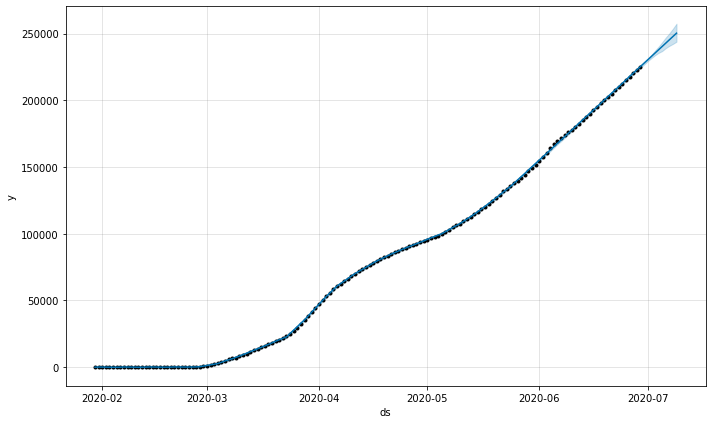

In [49]:
confirmed_forecast_iranPlot = prop.plot(forecast)

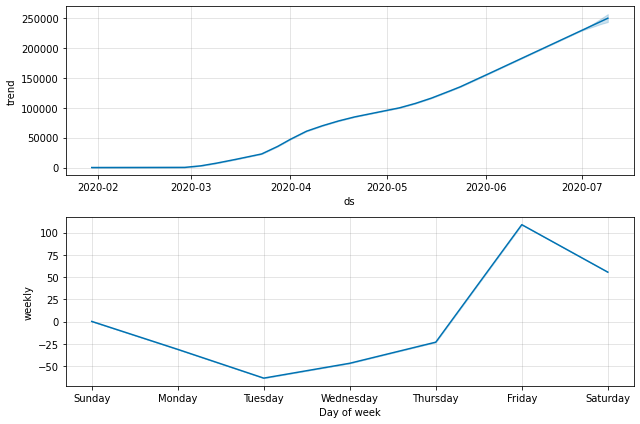

In [50]:
confirmed_forecast_iranPlot =prop.plot_components(forecast)

# Conclusion

The trend of Covid-19 in India is not similar to Iran as we can see in the plots of India and Iran(includes total confirmed,deaths and recovered cases).
In India,we can see the Confirmed cases started rising between mid of April and then by the end of May month the curve  rised sharply and today total cases in india are around 582k.
In Iran,we can see the confirmed cases started rising from end of march, but now we can see there is some stabilty in confirmed cases as compared to India as total cases in Iran till now 227k.
Also we can see the confirmed line and recovered line in the iran plots are almost parallel as recovered cases in iran are around 188k.

Also in India plot, as the total number of cases are increasing the recovery rate is also increasing.


Using Forecasting Library Prophet we can predict the  total number of cases india after 10 days would be in range **648k-667k**.
where as in Iran we can predict the  total number of cases after 10 days would be in range **250k-257k**.